In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [3]:
save_dir_root = '../data/ldle1/kleinbottle/'

In [4]:
X, labelsMat, ddX = datasets.Datasets().kleinbottle4d()

X.shape =  (10000, 4)


# LDLE

In [5]:
ldle_obj = ldle.LDLE(X=X, eta_min=20, max_iter0=40,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'summer', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

Using LDLE_1
A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 2500 points processed...
A_k, Atilde_k: 5000 points processed...
A_k, Atilde_k: 7500 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 2500 points processed...
local_param: 5000 points processed...
local_param: 7500 points processed...
local_param: all 10000 points processed...
After iter 1, max distortion is 2.560640
After iter 2, max distortion is 2.009678
After iter 3, max distortion is 2.009678
After iter 4, max distortion is 2.009678
After iter 5, max distortion is 2.009678
Max local distortion = 2.0096777928142644
###############
Took 50.3 seconds to perform step 1: construct low distoriton local views
###############

Clustering to obtain low distortion intermediate views...
# non-empty views with sz < 2 = 10000
#nodes in views with sz < 2 = 10000
Remaining #nodes in views with sz < 2 = 0
# non-empty

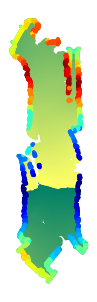

###############
Took 4.0 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.0002459001249910381


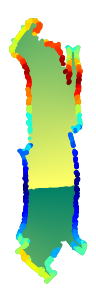

Iteration: 1
error: 0.0002502088347084491
Iteration: 2
error: 0.000248900894582305
Iteration: 3
error: 0.0002385225030765355
Iteration: 4
error: 0.00022891938643470217
Iteration: 5
error: 0.00022200014617402715


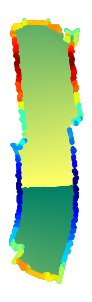

Iteration: 6
error: 0.00021206868541219303
Iteration: 7
error: 0.00020438797028831372
Iteration: 8
error: 0.00019883462892636953
Iteration: 9
error: 0.00019439084645803687
Iteration: 10
error: 0.00019103255688837398


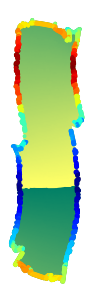

Iteration: 11
error: 0.0001883419121254054
Iteration: 12
error: 0.0001861767014312576
Iteration: 13
error: 0.00018440925330353084
Iteration: 14
error: 0.00018282762725254758
Iteration: 15
error: 0.00018163293966539325


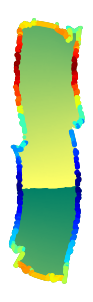

Iteration: 16
error: 0.00018063249310883598
Iteration: 17
error: 0.00017980110138123722
Iteration: 18
error: 0.00017907684176732264
Iteration: 19
error: 0.0001785315431248982
Iteration: 20
error: 0.00017800299118052453


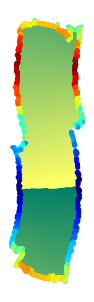

Iteration: 21
error: 0.00017760192856932847
Iteration: 22
error: 0.00017726268509519149
Iteration: 23
error: 0.00017703110356371315
Iteration: 24
error: 0.00017673309246092947
Iteration: 25
error: 0.00017655209249908504


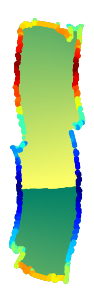

Iteration: 26
error: 0.0001764056805490287
Iteration: 27
error: 0.00017628805402941026
Iteration: 28
error: 0.00017618063205469543
Iteration: 29
error: 0.00017609828156623422
Iteration: 30
error: 0.0001760172305644


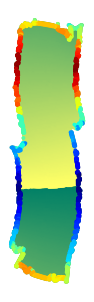

Iteration: 31
error: 0.00017594925539256043
Iteration: 32
error: 0.00017591350224377267
Iteration: 33
error: 0.00017590623496773354
Iteration: 34
error: 0.00017585806265842666
Iteration: 35
error: 0.00017582606075092685


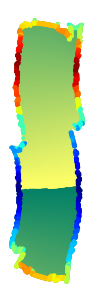

Iteration: 36
error: 0.00017581177083071054
Iteration: 37
error: 0.00017581892254317394
Iteration: 38
error: 0.00017579898430709093
Iteration: 39
error: 0.00017580806868434397


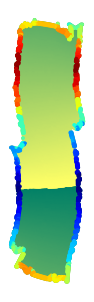

###############
Took 288.2 seconds to refine global embedding.
###############
###############
Took 292.7 seconds to perform step 3: compute global embedding.
###############


In [6]:
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [7]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

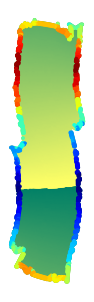

In [8]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,0], 'summer',
                             ldle_obj.color_of_pts_on_tear_final, 'jet', 'LDLE0_jet')

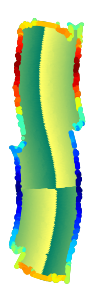

In [9]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,1], 'summer',
                             ldle_obj.color_of_pts_on_tear_final, 'jet', 'LDLE1_jet')

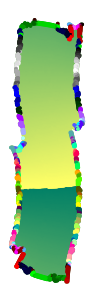

In [10]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,0], 'summer',
                             ldle_obj.color_of_pts_on_tear_final, 'colorcube', 'LDLE0_colorcube')

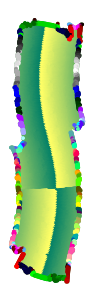

In [11]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,1], 'summer',
                             ldle_obj.color_of_pts_on_tear_final, 'colorcube', 'LDLE1_colorcube')

# LTSA

In [12]:
from matplotlib import pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

5


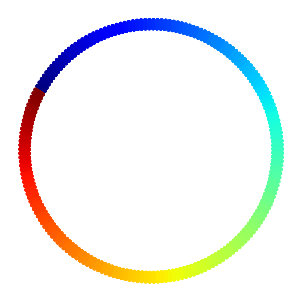

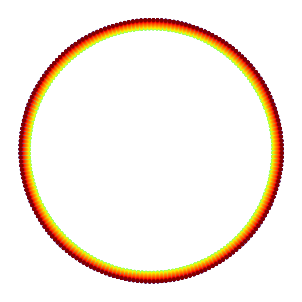

10


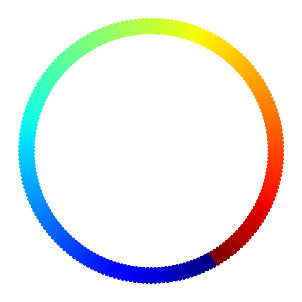

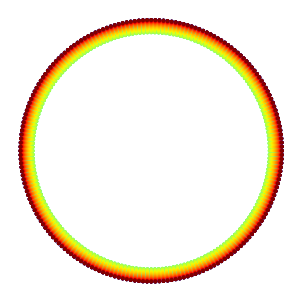

25


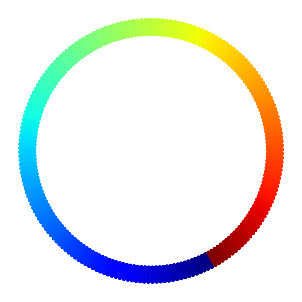

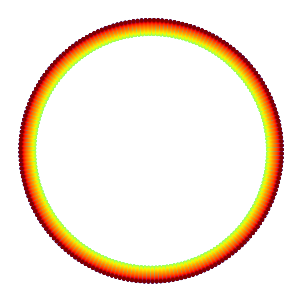

15


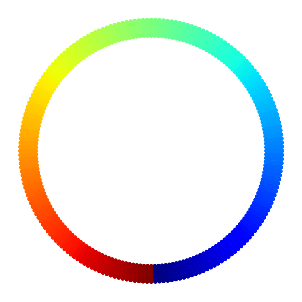

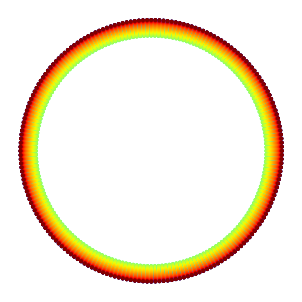

75


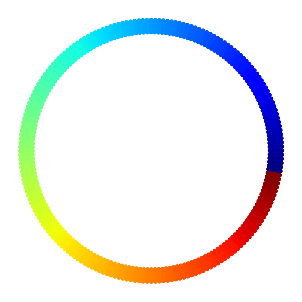

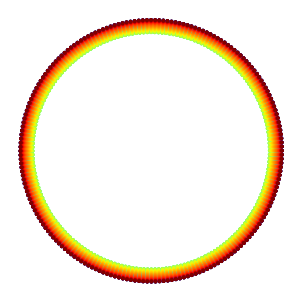

100


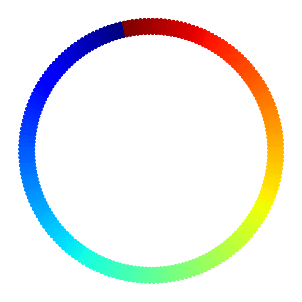

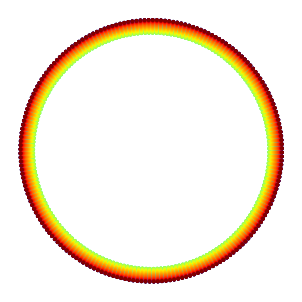

In [13]:
for n_neighbors in [5,10,25,15,75,100]:
    print(n_neighbors)
    ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=n_neighbors,
                                      n_components=2, n_jobs=-1, random_state=42)
    y_ltsa = ltsa_obj.fit_transform(X)
    vis.global_embedding(y_ltsa, labelsMat[:,0], 'jet', title='LTSA0_'+str(n_neighbors))
    plt.show()
    vis.global_embedding(y_ltsa, labelsMat[:,1], 'jet', title='LTSA1_'+str(n_neighbors))
    plt.show()

# UMAP

In [14]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

25 0.01


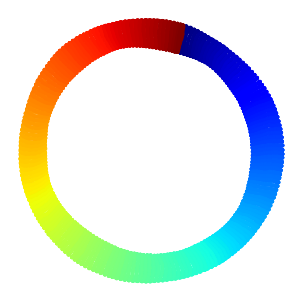

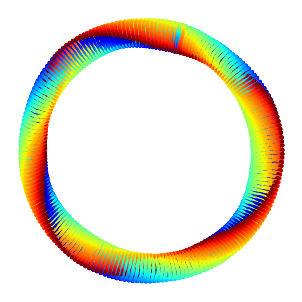

25 0.1


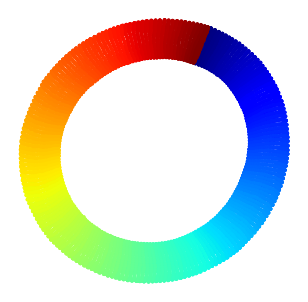

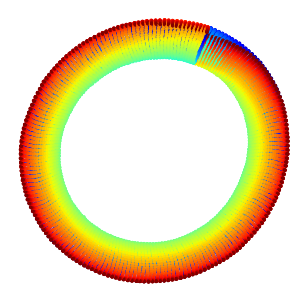

25 0.25


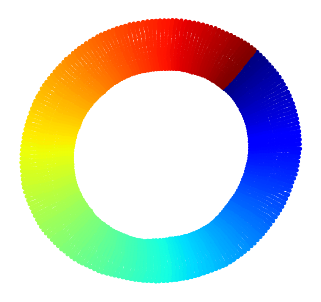

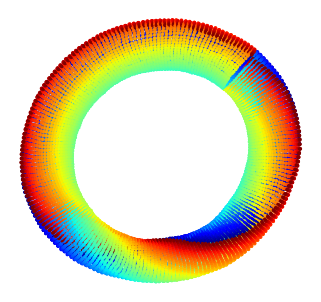

25 0.5


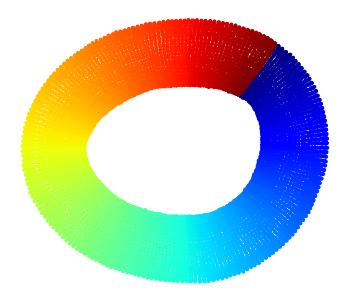

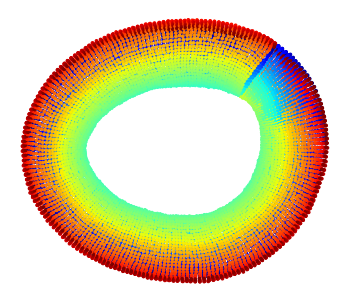

50 0.01


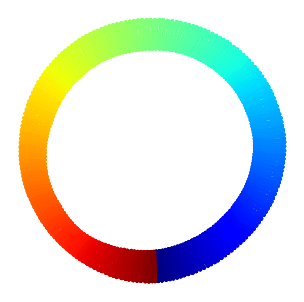

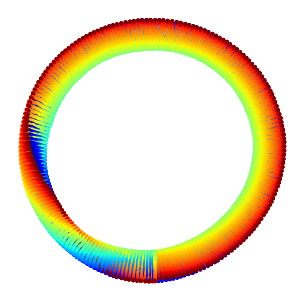

50 0.1


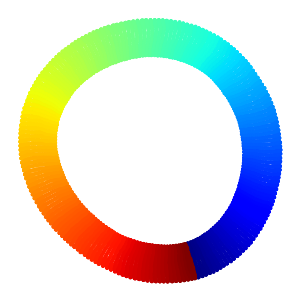

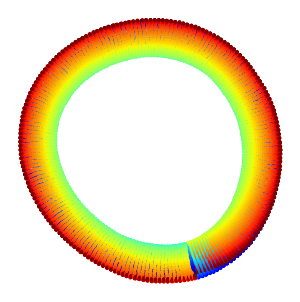

50 0.25


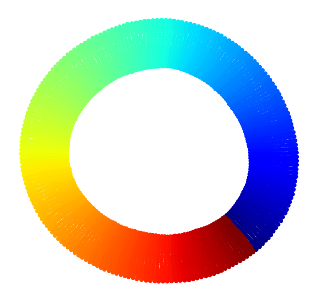

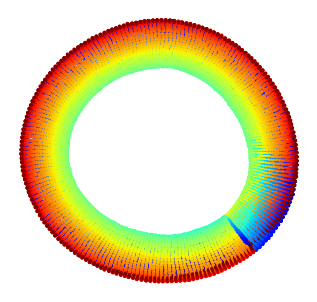

50 0.5


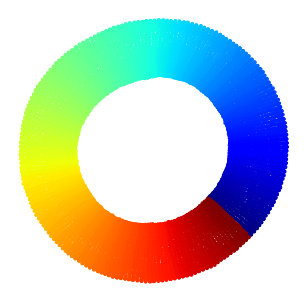

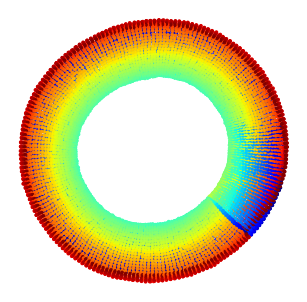

100 0.01


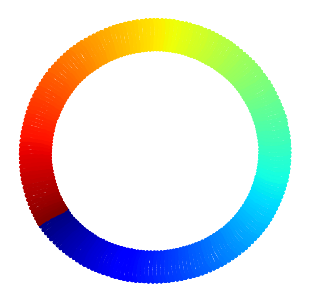

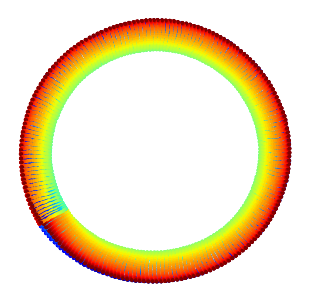

100 0.1


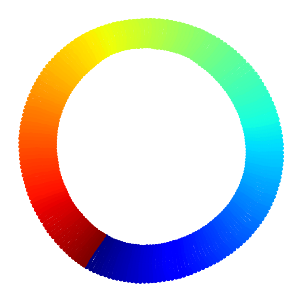

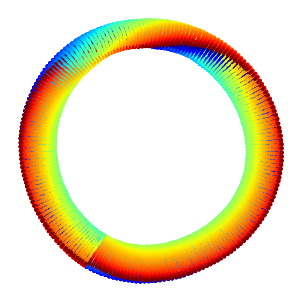

100 0.25


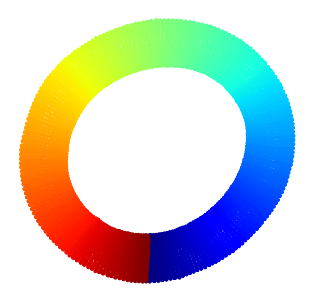

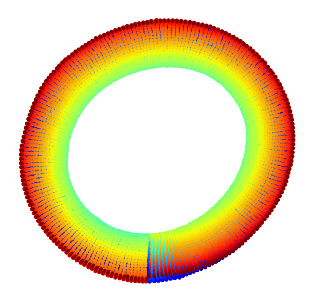

100 0.5


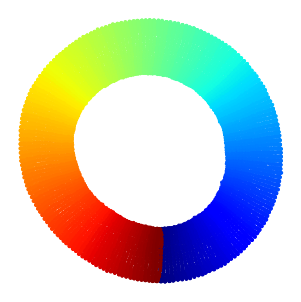

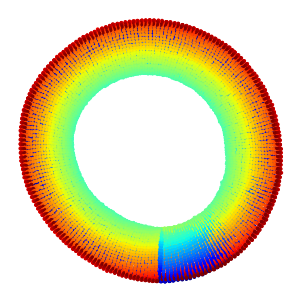

200 0.01


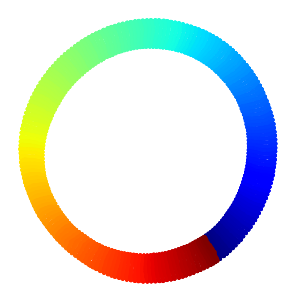

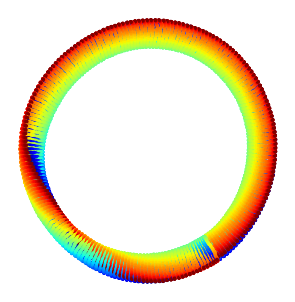

200 0.1


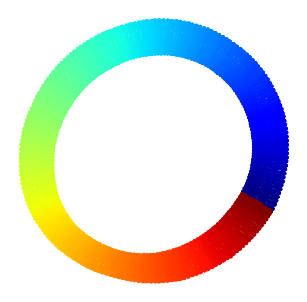

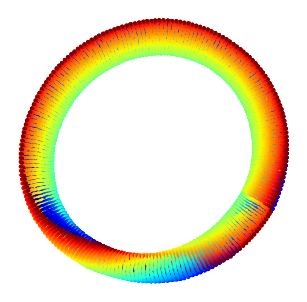

200 0.25


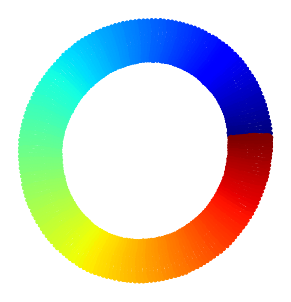

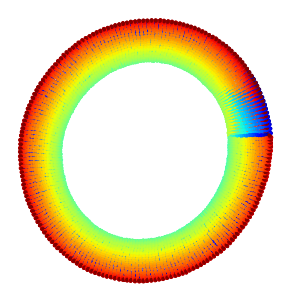

200 0.5


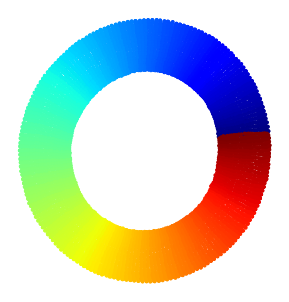

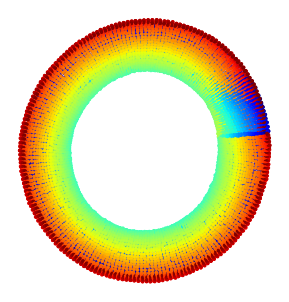

In [15]:
for n_neighbors in [25,50,100,200]:
    for min_dist in [0.01,0.1,0.25,0.5]:
        print(n_neighbors, min_dist)
        umap_obj = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2,
                        random_state=42, n_epochs=500, metric='euclidean')
        y_umap = umap_obj.fit_transform(X)
        vis.global_embedding(y_umap, labelsMat[:,0], 'jet', title='UMAP0_'+str(n_neighbors)+'_'+str(min_dist))
        plt.show()
        vis.global_embedding(y_umap, labelsMat[:,1], 'jet', title='UMAP1_'+str(n_neighbors)+'_'+str(min_dist))
        plt.show()

# t-SNE

In [16]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

30 2


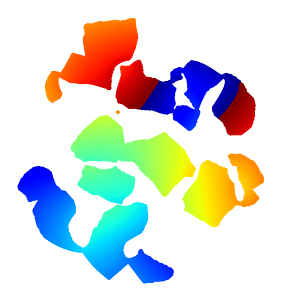

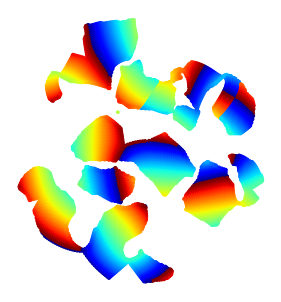

30 4


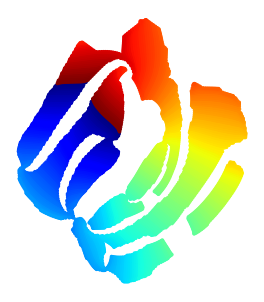

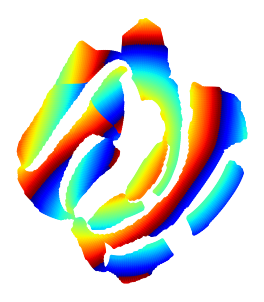

30 6


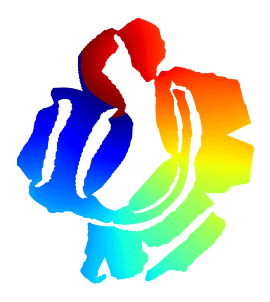

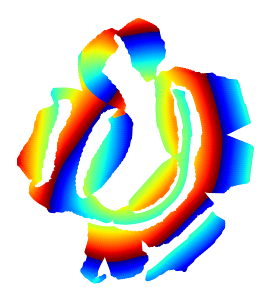

40 2


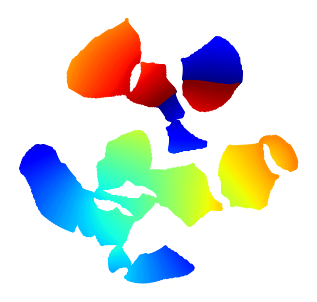

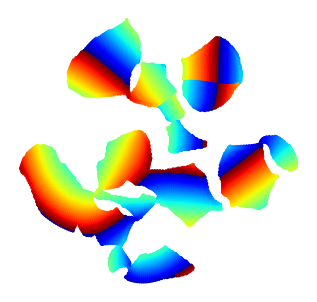

40 4


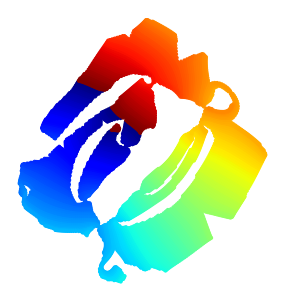

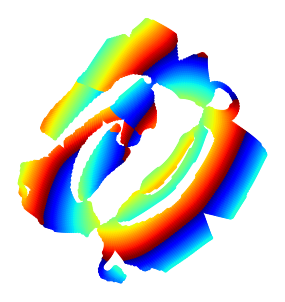

40 6


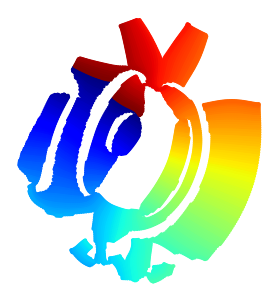

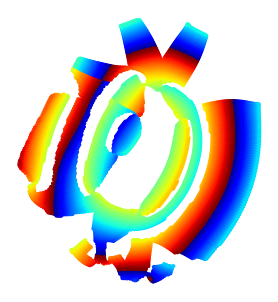

50 2


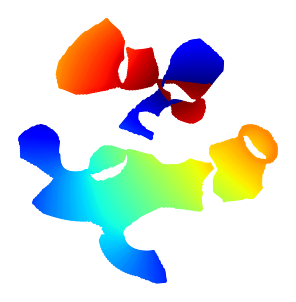

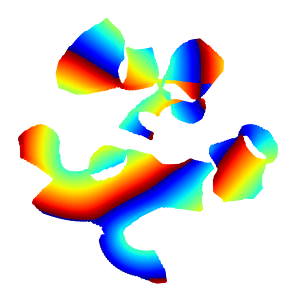

50 4


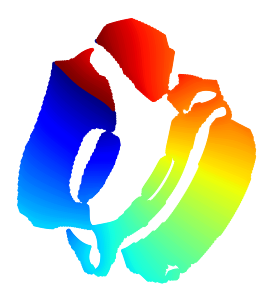

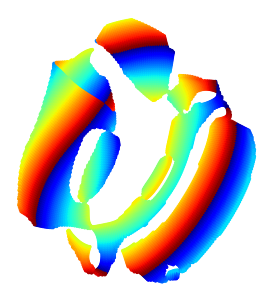

50 6


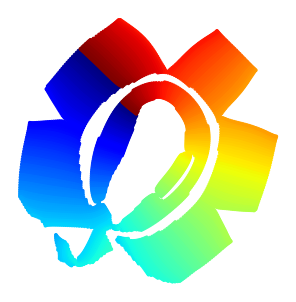

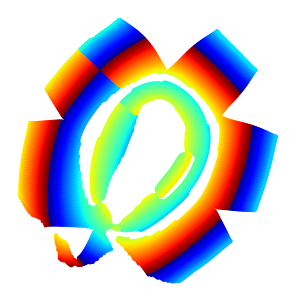

60 2


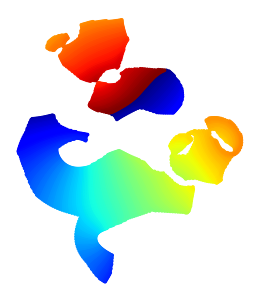

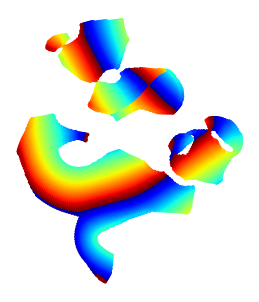

60 4


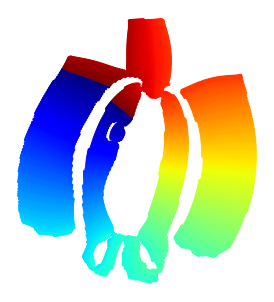

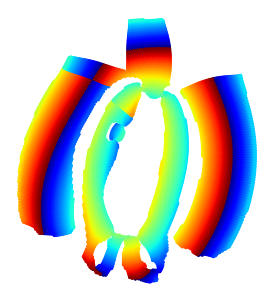

60 6


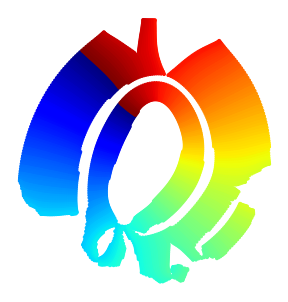

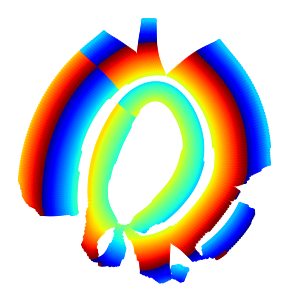

In [17]:
for perplexity in [30,40,50,60]:
    for ee in [2,4,6]:
        print(perplexity, ee)
        tsne_obj = TSNE(perplexity=perplexity, early_exaggeration=ee, n_components=2,
                        metric='euclidean', random_state=42, n_iter=1000,
                        n_jobs=-1, init='random')
        y_tsne = tsne_obj.fit_transform(X)
        vis.global_embedding(y_tsne, labelsMat[:,0], 'jet', title='t-SNE0_'+str(perplexity)+'_'+str(ee))
        plt.show()
        vis.global_embedding(y_tsne, labelsMat[:,1], 'jet', title='t-SNE1_'+str(perplexity)+'_'+str(ee))
        plt.show()